# 🏡 Data Cleaning Glow-Up: Nashville Housing Dataset

In this notebook, I’ll demonstrate cleaning of the **Nashville Housing Dataset**.  
We’ll start with **raw messy data**, identify issues, apply **cleaning steps**, and finish with a **clean dataset** ready for analysis.  

---

## 1. Import Libraries & Load Raw Data

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/Nashville_housing_data_2013_2016.csv')

# Preview raw data
data.head()

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [ ]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       56636 non-null  int64  
 1   Unnamed: 0                         56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [ ]:
# Summary statistics
data.describe()

,Unnamed: 0.1,Unnamed: 0,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,56636.00000,56636.00000,5.663600e+04,26017.000000,26017.000000,2.601700e+04,2.601700e+04,2.601700e+04,24166.000000,24165.000000,24159.000000,24277.000000,24146.000000
mean,28317.50000,28317.50000,3.272111e+05,0.498903,4356.215782,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.749224,3.090029,1.886106,0.283981
std,16349.54926,16349.54926,9.287425e+05,1.570396,2170.348270,1.060405e+05,2.068041e+05,2.810703e+05,1687.017313,26.546141,0.852942,0.961572,0.487905
min,0.00000,0.00000,5.000000e+01,0.010000,107.000000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,14158.75000,14158.75000,1.350000e+05,0.180000,3126.000000,2.100000e+04,7.590000e+04,1.028000e+05,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,28317.50000,28317.50000,2.054500e+05,0.270000,3929.000000,2.880000e+04,1.114000e+05,1.485000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,42476.25000,42476.25000,3.290000e+05,0.450000,6228.000000,6.000000e+04,1.807000e+05,2.685000e+05,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,56635.00000,56635.00000,5.427806e+07,160.060000,9530.000000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [ ]:
# Missing values
data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Parcel ID,0
Land Use,0
Property Address,159
Suite/ Condo #,50527
Property City,159
Sale Date,0
Sale Price,0
Legal Reference,0


In [ ]:
raw_data = data.copy()   # store raw version


## 2.Visualize Before Cleaning

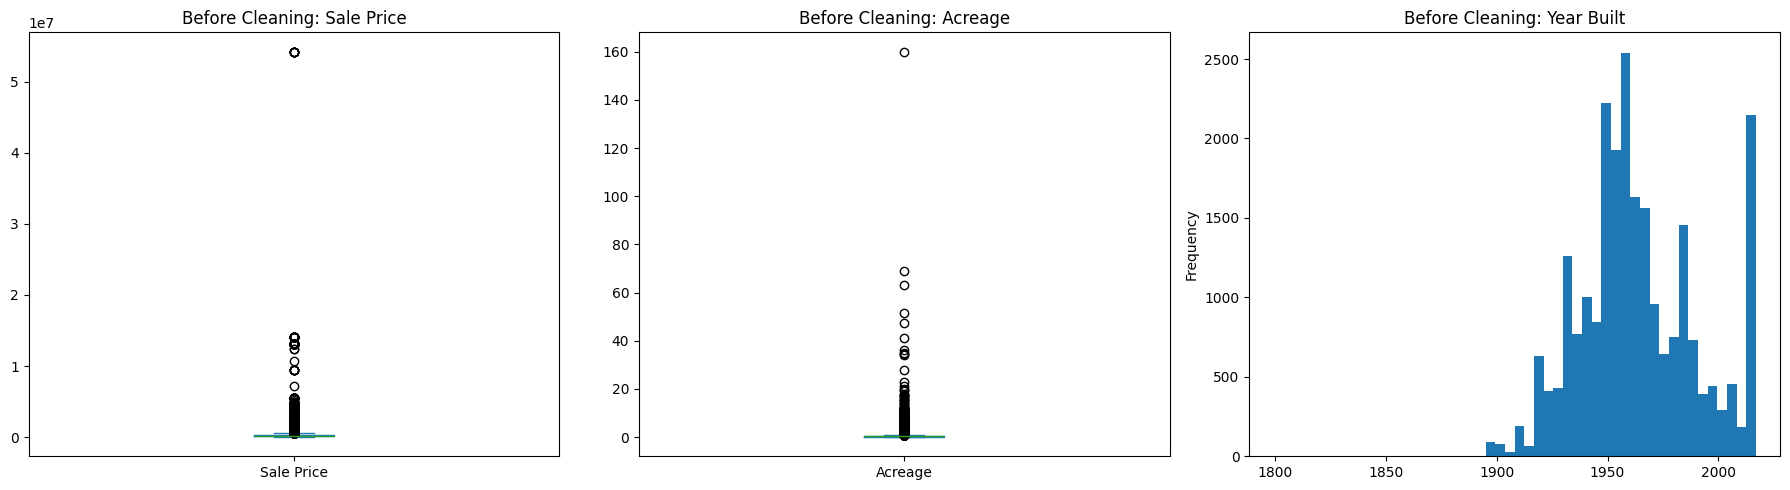

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Sale Price
raw_data["Sale Price"].plot(kind="box", ax=axes[0], title="Before Cleaning: Sale Price")

# Acreage
raw_data["Acreage"].plot(kind="box", ax=axes[1], title="Before Cleaning: Acreage")

# Year Built
raw_data["Year Built"].plot(kind="hist", bins=50, ax=axes[2], title="Before Cleaning: Year Built")

plt.tight_layout()
plt.show()


In [ ]:
data.duplicated().sum()

np.int64(0)

## 3.Cleaning Steps

In [ ]:
data = data.drop_duplicates()

In [ ]:
# Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
# Fix date formats
data["sale_date"] = pd.to_datetime(data["sale_date"], errors="coerce")

In [ ]:
# Fill missing values
data['land_value'] = data['land_value'].fillna(data['land_value'].median())

In [ ]:
# Remove unwanted symbols from numeric columns
data['sale_price'] = data['sale_price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
#Fix categorical inconsistencies (e.g., "Residential" vs "RESIDENTIAL").
data["land_use"] = data["land_use"].str.title()

In [ ]:
# Remove Sale Price outliers
data = data[data["sale_price"].between(1000, 5_000_000)]

# Filter Year Built
data = data[(data["year_built"] >= 1800) & (data["year_built"] <= 2023)]

# Remove extreme acreage
data = data[data["acreage"] < 50]


## 4.Validate Cleaned Data

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
unnamed:_0.1,0
unnamed:_0,0
parcel_id,0
land_use,0
property_address,2
suite/_condo___#,24156
property_city,2
sale_date,0
sale_price,0
legal_reference,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24158 entries, 1 to 56616
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   unnamed:_0.1                       24158 non-null  int64         
 1   unnamed:_0                         24158 non-null  int64         
 2   parcel_id                          24158 non-null  object        
 3   land_use                           24158 non-null  object        
 4   property_address                   24156 non-null  object        
 5   suite/_condo___#                   2 non-null      object        
 6   property_city                      24156 non-null  object        
 7   sale_date                          24158 non-null  datetime64[ns]
 8   sale_price                         24158 non-null  float64       
 9   legal_reference                    24158 non-null  object        
 10  sold_as_vacant                     2415

In [ ]:
data.describe()

,unnamed:_0.1,unnamed:_0,sale_date,sale_price,acreage,neighborhood,land_value,building_value,total_value,finished_area,year_built,bedrooms,full_bath,half_bath
count,24158.000000,24158.000000,24158,2.415800e+04,24158.000000,24158.000000,2.415800e+04,2.415800e+04,2.415800e+04,24157.000000,24158.00000,24141.000000,24155.000000,24024.000000
mean,27840.122196,27840.122196,2015-01-26 13:03:11.042304768,2.742633e+05,0.452921,4419.497309,6.880527e+04,1.724196e+05,2.438798e+05,1918.302008,1963.75743,3.091380,1.894763,0.285381
min,1.000000,1.000000,2013-01-02 00:00:00,1.000000e+03,0.040000,107.000000,1.000000e+02,1.400000e+03,1.260000e+04,450.000000,1832.00000,0.000000,0.000000,0.000000
25%,13269.250000,13269.250000,2014-03-17 00:00:00,1.250000e+05,0.190000,3130.000000,2.160000e+04,8.360000e+04,1.096000e+05,1239.000000,1948.00000,3.000000,1.000000,0.000000
50%,27516.500000,27516.500000,2015-03-04 00:00:00,1.850000e+05,0.270000,4026.000000,2.990000e+04,1.174000e+05,1.545500e+05,1632.000000,1960.00000,3.000000,2.000000,0.000000
75%,42269.750000,42269.750000,2015-12-22 00:00:00,3.250000e+05,0.450000,6229.000000,6.030000e+04,1.892000e+05,2.780000e+05,2212.000000,1983.00000,3.000000,2.000000,1.000000
max,56616.000000,56616.000000,2016-10-31 00:00:00,5.000000e+06,47.500000,9530.000000,1.869000e+06,5.824300e+06,6.402600e+06,25193.000000,2017.00000,11.000000,10.000000,3.000000
std,16600.895132,16600.895132,NaN,2.920672e+05,0.785338,2139.512923,1.011451e+05,1.912863e+05,2.686514e+05,1117.976560,26.52627,0.849933,0.953817,0.488703


## 5. Visualize After Cleaning

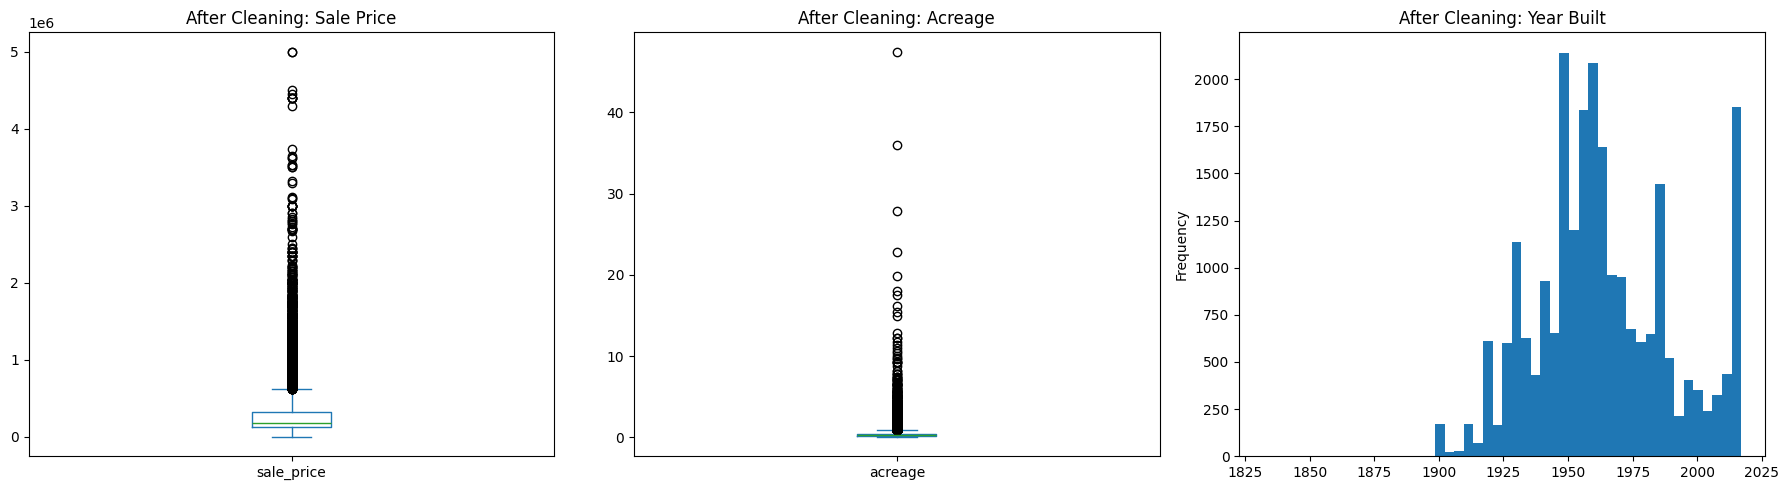

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Sale Price
data["sale_price"].plot(kind="box", ax=axes[0], title="After Cleaning: Sale Price")

# Acreage
data["acreage"].plot(kind="box", ax=axes[1], title="After Cleaning: Acreage")

# Year Built
data["year_built"].plot(kind="hist", bins=50, ax=axes[2], title="After Cleaning: Year Built")

plt.tight_layout()
plt.show()
